## Unsupervied Analysis of Days of Week

Treating crossings each days as features to learn about the relationships between days.

In [85]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get data

In [86]:
import jupyterworkflow.data as jwd
df = jwd.get_fremont_data()

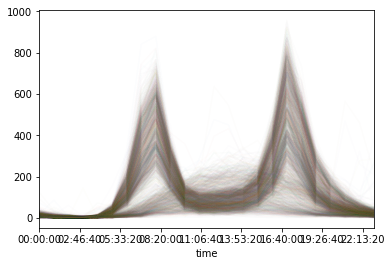

In [87]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.plot(legend=False, alpha=0.01)

This plot shows there are 2 different categories of days. A good hypothesis is weekdays and weekends.
- weekday commute pattern with 2 peaks corresponding to office to/fro timings.
- weekend pattern with a bulge during the noon.

In [88]:
X = pivoted.fillna(0).T.values
X.shape

(2128, 24)

## Principal component analysis

In [89]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

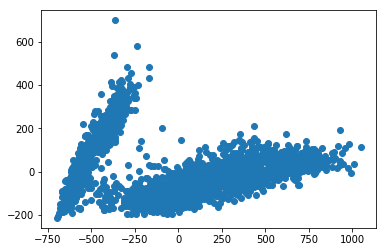

In [90]:
plt.scatter(X2[:,0], X2[:,1])

So, PCA gives these 2 clusters. But, what are these 2?

Let's label our data with cluster number by using clustering.

## Unsupervised clustering

In [91]:
gmm = GaussianMixture(2) # because from PCA output we know, there are 2 clusters
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 1, 0, 0])

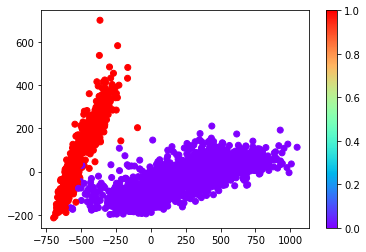

In [92]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

GMM did a good job of labeling the clusters.

Let's see, how the data looks like for each of the labels?

Text(0.5,1,u'Red cluster (label 1)')

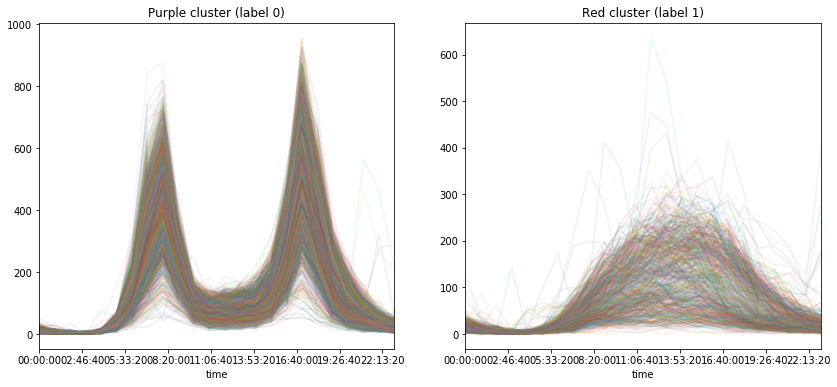

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1])
ax[0].set_title('Purple cluster (label 0)')
ax[1].set_title('Red cluster (label 1)')

Aah! Label 0 must be weekdays and Label 1, weekends.

Let's compare our results with the day of week for all dates in our data.

## Comparing with dayofweek

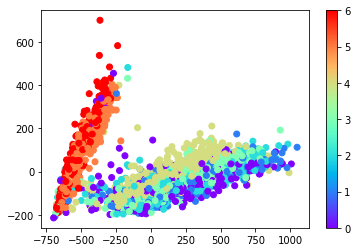

In [94]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

So, this verifies our previous hypothesis. 
- label 0 cluster from gmm has days 0-4 which are weekdays
- label 1 cluster from gmm has days 5,6 which are weekends

But we can see some weekdays i.e. 0-4 days in the weekend cluster i.e. label 1.

## Analyzing outliers

Below are some dates which belong to the weekend cluster but are weekdays.

In [95]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04'],
              dtype='datetime64[ns]', freq=None)

So all the above looks like US/Seattle holidays. This is pretty cool!

But what was on 2017-02-06? [Snow Storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)